<a href="https://colab.research.google.com/github/stentoumi/entso_nn/blob/main/lstm_entso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_data(path):
  #import the dataset
  data = pd.read_csv(path, index_col=0, parse_dates=[0])
  #set the index to datetime
  data.index = pd.to_datetime(data.index, utc=True)
  #data.index = pd.to_datetime(data.index)
  return data 

#read energy data
df_energy = read_data('energy_dataset.csv')

df_energy = df_energy[['total load actual', 'total load forecast']]

null_vals = df_energy.isnull().sum()
print('Null values in the target column {}'.format(null_vals))
df_energy.head()


Null values in the target column total load actual      36
total load forecast     0
dtype: int64


,total load actual,total load forecast
time,,
2014-12-31 23:00:00+00:00,25385.0,26118.0
2015-01-01 00:00:00+00:00,24382.0,24934.0
2015-01-01 01:00:00+00:00,22734.0,23515.0
2015-01-01 02:00:00+00:00,21286.0,22642.0
2015-01-01 03:00:00+00:00,20264.0,21785.0


In [2]:
#fill nan values
df_energy = df_energy.interpolate(method='linear', axis=0)
df_energy.isnull().sum()

total load actual      0
total load forecast    0
dtype: int64

In [3]:
#import the  weather dataset
#only temperature
weather = read_data('weather_features.csv')
df_weather = weather[['city_name', 'temp', 'temp_min', 'temp_max']]

null_vals = df_weather.isnull().sum()
print('Null values in the target column {}'.format(null_vals))
df_weather.head()

Null values in the target column city_name    0
temp         0
temp_min     0
temp_max     0
dtype: int64


,city_name,temp,temp_min,temp_max
dt_iso,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686


In [4]:
#get data for only one city
def group_cities():
  gb = df_weather.groupby('city_name')    
  cities = [gb.get_group(x) for x in gb.groups]

  for city in cities:
    #print(city.shape)
    if df_energy.index.min() == city.index.min() and df_energy.index.max()==city.index.max():
      return city
  #df_cities = pd.DataFrame(cities)


city = group_cities()
print(city)

                            city_name     temp  temp_min  temp_max
dt_iso                                                            
2014-12-31 23:00:00+00:00   Barcelona  281.625   281.625   281.625
2015-01-01 00:00:00+00:00   Barcelona  281.625   281.625   281.625
2015-01-01 01:00:00+00:00   Barcelona  281.286   281.286   281.286
2015-01-01 02:00:00+00:00   Barcelona  281.286   281.286   281.286
2015-01-01 03:00:00+00:00   Barcelona  281.286   281.286   281.286
...                               ...      ...       ...       ...
2018-12-31 18:00:00+00:00   Barcelona  284.130   282.150   286.150
2018-12-31 19:00:00+00:00   Barcelona  282.640   281.150   284.150
2018-12-31 20:00:00+00:00   Barcelona  282.140   280.150   284.150
2018-12-31 21:00:00+00:00   Barcelona  281.130   278.150   284.150
2018-12-31 22:00:00+00:00   Barcelona  280.130   277.150   283.150

[35476 rows x 4 columns]


In [35]:
df = pd.concat([df_energy, city], axis=1)
#df.drop(labels='city_name', axis=1, inplace=True)
index = df.index
df.head(30)
#null_vals = df.isnull().sum()
#print('Null values in the target column {}'.format(null_vals))

,total load actual,total load forecast,city_name,temp,temp_min,temp_max
2014-12-31 23:00:00+00:00,25385.0,26118.0,Barcelona,281.625000,281.625000,281.625000
2015-01-01 00:00:00+00:00,24382.0,24934.0,Barcelona,281.625000,281.625000,281.625000
2015-01-01 01:00:00+00:00,22734.0,23515.0,Barcelona,281.286000,281.286000,281.286000
2015-01-01 02:00:00+00:00,21286.0,22642.0,Barcelona,281.286000,281.286000,281.286000
2015-01-01 03:00:00+00:00,20264.0,21785.0,Barcelona,281.286000,281.286000,281.286000
2015-01-01 04:00:00+00:00,19905.0,21441.0,Barcelona,280.467000,280.467000,280.467000
2015-01-01 05:00:00+00:00,20010.0,21285.0,Barcelona,280.467000,280.467000,280.467000
2015-01-01 06:00:00+00:00,20377.0,21545.0,Barcelona,280.467000,280.467000,280.467000
2015-01-01 07:00:00+00:00,20094.0,21443.0,Barcelona,280.751000,280.751000,280.751000
2015-01-01 08:00:00+00:00,20637.0,21560.0,Barcelona,280.751000,280.751000,280.751000


In [6]:
Y = df['total load actual']
X = df[['total load actual', 'temp']]

from sklearn.model_selection import train_test_split

#1 year in test
test_samples = 365*24
test_size = test_samples / X.shape[0]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size,  shuffle = False)
train_index = x_train.index
test_index = x_test.index
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((26716, 2), (26716,), (8760, 2), (8760,))

In [7]:
#Standar Scaling 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test =  scaler.transform(x_test)
x_train = pd.DataFrame(x_train, index=train_index ,columns=['total load actual', 'temp'])
x_test = pd.DataFrame(x_test, index = test_index, columns=['total load actual', 'temp'])

load = pd.concat([x_train['total load actual'], x_test['total load actual']])
temp = pd.concat([x_train['temp'], x_test['temp']])

df['total load actual']=load
df['temp'] = temp
df

,total load actual,total load forecast,city_name,temp,temp_min,temp_max
2014-12-31 23:00:00+00:00,-0.700261,26118.0,Barcelona,-1.251072,281.625,281.625
2015-01-01 00:00:00+00:00,-0.920014,24934.0,Barcelona,-1.251072,281.625,281.625
2015-01-01 01:00:00+00:00,-1.281084,23515.0,Barcelona,-1.302814,281.286,281.286
2015-01-01 02:00:00+00:00,-1.598335,22642.0,Barcelona,-1.302814,281.286,281.286
2015-01-01 03:00:00+00:00,-1.822251,21785.0,Barcelona,-1.302814,281.286,281.286
...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0.453935,30619.0,Barcelona,-0.868730,282.150,286.150
2018-12-31 19:00:00+00:00,0.252806,29932.0,Barcelona,-1.096151,281.150,284.150
2018-12-31 20:00:00+00:00,-0.111770,27903.0,Barcelona,-1.172467,280.150,284.150
2018-12-31 21:00:00+00:00,-0.609117,25450.0,Barcelona,-1.326625,278.150,284.150


In [8]:
#drop city_name column
df.drop(labels='city_name', axis=1, inplace=True)
df.head()

,total load actual,total load forecast,temp,temp_min,temp_max
2014-12-31 23:00:00+00:00,-0.700261,26118.0,-1.251072,281.625,281.625
2015-01-01 00:00:00+00:00,-0.920014,24934.0,-1.251072,281.625,281.625
2015-01-01 01:00:00+00:00,-1.281084,23515.0,-1.302814,281.286,281.286
2015-01-01 02:00:00+00:00,-1.598335,22642.0,-1.302814,281.286,281.286
2015-01-01 03:00:00+00:00,-1.822251,21785.0,-1.302814,281.286,281.286


In [9]:
# add the load of the last 24 hours 
def last_day_values(total_load, prev_days):
  '''
    df: dataframe
    prev_days: number of days used as historical data

    returns:  with historical data for the last 24 hours of each date

  '''
  last_day = []
  for i in range(prev_days*24):
    last_day.append(np.zeros(24))
  for i in range(prev_days*24,len(total_load)):   
    # the demand values of the most recent 24 hours
    last_day.append(total_load[i-24:i])
  last_day = np.array(last_day)

  return last_day

last_day = last_day_values(df['total load actual'], 1)
df['last_24_hours_load'] = last_day.tolist()

In [10]:
def previous_day_load(total_load, prev_days):
  prev_day =[]
  for i in range(prev_days*24):
    prev_day.append(0)
  for i in range(prev_days*24, len(total_load)):
    prev_day.append(total_load[i-24])
  prev_day = np.array(prev_day)
  return prev_day
prev_day = previous_day_load(df['total load actual'], 1)
df['previous_day'] = prev_day.tolist()

In [11]:
#add weekday information
import datetime 
def weekday_info(df):
  for i in range(len(df)):
      position = df.index[i]
      weekday = position.weekday()
      if (weekday == 6 or weekday== 5):
          df.loc[position, 'weekday'] = 1 #weekend
      else:
          df.loc[position, 'weekday'] = 0 #weekday
  return df

df = weekday_info(df)


In [12]:
# multiple demand values every 24 hours within a week

def last_week_values(total_load, temp, prev_days):
    '''
    df: dataframe
    prev_days: number of days used as historical data

    returns: historical data for the last week of each date

  '''
    last_week_load = []
    last_week_temp = []
    for i in range(prev_days*24):
      last_week_load.append(np.zeros(7))
      last_week_temp.append(np.zeros(7))
    for i in range(prev_days*24,len(total_load)):  
      index = [i-24, i-48, i-72, i-96, i-120, i-144, i-168] 
      last_week_load.append(total_load[index])
      last_week_temp.append(temp[index])
    last_week_load = np.array(last_week_load)
    last_week_temp = np.array(last_week_temp)

    return last_week_load, last_week_temp

last_week_load, last_week_temp = last_week_values(df['total load actual'], df['temp'], 7)
df['last_week_load'] = last_week_load.tolist()
df['last_week_temp'] = last_week_temp.tolist()

In [13]:
Y

2014-12-31 23:00:00+00:00    25385.0
2015-01-01 00:00:00+00:00    24382.0
2015-01-01 01:00:00+00:00    22734.0
2015-01-01 02:00:00+00:00    21286.0
2015-01-01 03:00:00+00:00    20264.0
                              ...   
2018-12-31 18:00:00+00:00    30653.0
2018-12-31 19:00:00+00:00    29735.0
2018-12-31 20:00:00+00:00    28071.0
2018-12-31 21:00:00+00:00    25801.0
2018-12-31 22:00:00+00:00    24455.0
Name: total load actual, Length: 35476, dtype: float64

In [14]:
df

,total load actual,total load forecast,temp,temp_min,temp_max,last_24_hours_load,previous_day,weekday,last_week_load,last_week_temp
2014-12-31 23:00:00+00:00,-0.700261,26118.0,-1.251072,281.625,281.625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2015-01-01 00:00:00+00:00,-0.920014,24934.0,-1.251072,281.625,281.625,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2015-01-01 01:00:00+00:00,-1.281084,23515.0,-1.302814,281.286,281.286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2015-01-01 02:00:00+00:00,-1.598335,22642.0,-1.302814,281.286,281.286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2015-01-01 03:00:00+00:00,-1.822251,21785.0,-1.302814,281.286,281.286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0.453935,30619.0,-0.868730,282.150,286.150,"[0.14019029568326344, 0.32006792588089517, 0.3...",0.140190,0.0,"[0.14019029568326344, 0.37024085805538687, 0.9...","[-1.0961509448617799, -1.3250984302952304, -1...."
2018-12-31 19:00:00+00:00,0.252806,29932.0,-1.096151,281.150,284.150,"[0.32006792588089517, 0.3610388355605019, 0.12...",0.320068,0.0,"[0.32006792588089517, 0.4903053420362665, 0.88...","[-1.2487826018174135, -1.477730087250864, -1.3..."
2018-12-31 20:00:00+00:00,-0.111770,27903.0,-1.172467,280.150,284.150,"[0.3610388355605019, 0.12353901688299547, -0.3...",0.361039,0.0,"[0.3610388355605019, 0.4681766688938051, 0.783...","[-1.477730087250864, -1.554045915728681, -1.47..."
2018-12-31 21:00:00+00:00,-0.609117,25450.0,-1.326625,278.150,284.150,"[0.12353901688299547, -0.3608817387405901, -0....",0.123539,0.0,"[0.12353901688299547, 0.16889184203635693, 0.4...","[-1.555572232298236, -1.7066775726843146, -1.5..."


In [15]:
#X = df[['temp', 'weekday', 'last_week_load', 'last_week_temp' ]]
#X = df[[ 'last_week_load', 'last_week_temp' ]]
X = df[['temp', 'weekday', 'previous_day']]
#X = df[['temp']]
X


,temp,weekday,previous_day
2014-12-31 23:00:00+00:00,-1.251072,0.0,0.000000
2015-01-01 00:00:00+00:00,-1.251072,0.0,0.000000
2015-01-01 01:00:00+00:00,-1.302814,0.0,0.000000
2015-01-01 02:00:00+00:00,-1.302814,0.0,0.000000
2015-01-01 03:00:00+00:00,-1.302814,0.0,0.000000
...,...,...,...
2018-12-31 18:00:00+00:00,-0.868730,0.0,0.140190
2018-12-31 19:00:00+00:00,-1.096151,0.0,0.320068
2018-12-31 20:00:00+00:00,-1.172467,0.0,0.361039
2018-12-31 21:00:00+00:00,-1.326625,0.0,0.123539


In [16]:
#Maybe we should exclude the lines with missing historical data
index = 24

X = X.iloc[index:]
Y = Y.iloc[index:]
X

,temp,weekday,previous_day
2015-01-01 23:00:00+00:00,-1.074935,0.0,-0.700261
2015-01-02 00:00:00+00:00,-1.074935,0.0,-0.920014
2015-01-02 01:00:00+00:00,-1.214593,0.0,-1.281084
2015-01-02 02:00:00+00:00,-1.214593,0.0,-1.598335
2015-01-02 03:00:00+00:00,-1.214593,0.0,-1.822251
...,...,...,...
2018-12-31 18:00:00+00:00,-0.868730,0.0,0.140190
2018-12-31 19:00:00+00:00,-1.096151,0.0,0.320068
2018-12-31 20:00:00+00:00,-1.172467,0.0,0.361039
2018-12-31 21:00:00+00:00,-1.326625,0.0,0.123539


In [17]:
from sklearn.model_selection import train_test_split

#1 year in test
test_samples = 365*24
test_size = test_samples / X.shape[0]
#test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size,  shuffle = False)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26692, 3), (26692,), (8760, 3), (8760,))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
from keras import layers
import tensorflow as tf
import keras

#input  = keras.Input()
model = Sequential()
model.add(LSTM(60, input_shape=(24,3)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))


def create_dataset(datasetX, datasetY, look_back):
    dataX, dataY = [], []
    for i in range(len(datasetX)-look_back):
        dataX.append(datasetX[i:(i+look_back)])
        dataY.append(datasetY[i + look_back]) 
    return np.array(dataX), np.array(dataY)

train_x, train_y = create_dataset(x_train, y_train, 24) 

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae','mape'])
history=model.fit(train_x, train_y, epochs=300, batch_size=100)

Epoch 1/300
267/267 [==============================] - 25s 22ms/step - loss: 832923031.6418 - root_mean_squared_error: 28819.9199 - mae: 28499.2853 - mape: 99.9184
Epoch 2/300
267/267 [==============================] - 6s 21ms/step - loss: 826811458.8657 - root_mean_squared_error: 28870.4040 - mae: 28389.9571 - mape: 99.2925
Epoch 3/300
267/267 [==============================] - 6s 21ms/step - loss: 806974566.9254 - root_mean_squared_error: 28750.9018 - mae: 28038.1399 - mape: 98.1042
Epoch 4/300
267/267 [==============================] - 5s 20ms/step - loss: 780410426.2687 - root_mean_squared_error: 28585.0190 - mae: 27558.1511 - mape: 96.3645
Epoch 5/300
267/267 [==============================] - 6s 21ms/step - loss: 745768762.0299 - root_mean_squared_error: 28368.1763 - mae: 26927.9392 - mape: 94.1250
Epoch 6/300
267/267 [==============================] - 6s 21ms/step - loss: 707597450.0299 - root_mean_squared_error: 28109.7300 - mae: 26208.6689 - mape: 91.4449
Epoch 7/300
267/267 [

834/834 [==============================] - 5s 6ms/step - loss: 2308568.7500 - root_mean_squared_error: 5979.1416 - mae: 1098.5729 - mape: 3.9312


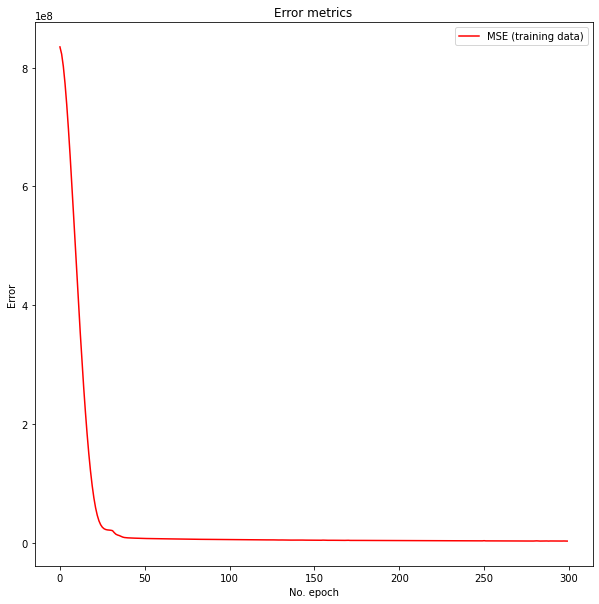

In [34]:
test_loss = model.evaluate(train_x, train_y)
# Plot history: MSE
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(history.history['loss'], label='MSE (training data)',color='r')
#plt.plot(history.history['root_mean_squared_error'], label='RMSE (training data)')
#plt.plot(history.history['mae'], label='MAE (training data)')
#plt.plot(history.history['mape'], label='MAPE (training data)')
plt.title('Error metrics')
plt.ylabel('Error')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

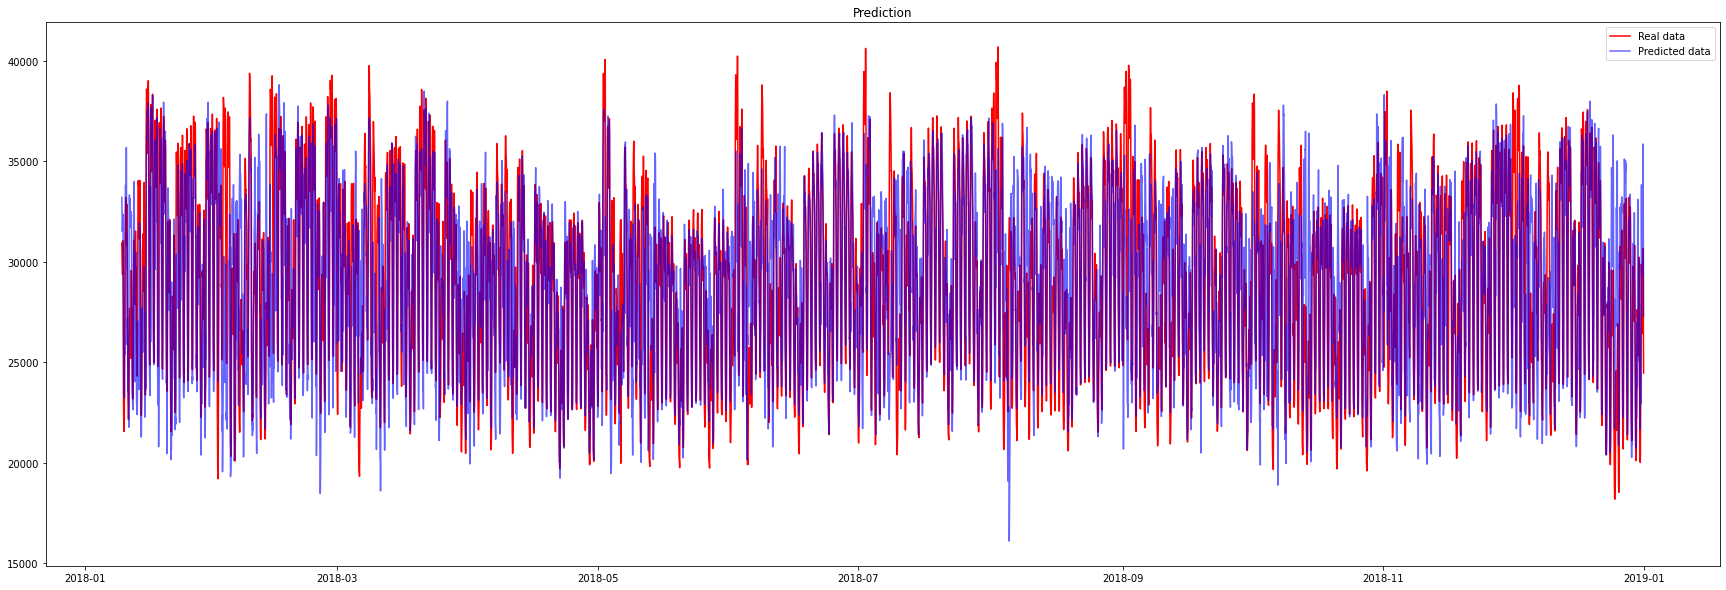

In [20]:
test_x, test_y = create_dataset(x_test, y_test, 24) 
y_pred = y_test[24:].copy(deep=True)

#Make predictions dor test set
y_pred1 = model.predict(test_x)

for i in range(len(y_pred)):
  y_pred.iloc[i]=y_pred1[i]

plt.rcParams["figure.figsize"] = (30,10)
plt.plot(y_test[24:], color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data', alpha=0.6)
plt.title('Prediction')
plt.legend()
plt.show()

In [21]:
trainScore = model.evaluate(train_x, train_y)
print('Train Score: ')
print("Mean Squared Error: %10.2f , Root Mean Squared Error: %10.2f , Mean Absolute Error: %10.2f , Mean Absolute Percenrage Error: %10.2f" % (trainScore[0],trainScore[1],trainScore[2],trainScore[3]))
testScore = model.evaluate(test_x, test_y)
print('Test Score: ')
print("Mean Squared Error: %10.2f , Root Mean Squared Error: %10.2f , Mean Absolute Error: %10.2f , Mean Absolute Percenrage Error: %10.2f" % (testScore[0],testScore[1],testScore[2],testScore[3]))

834/834 [==============================] - 4s 4ms/step - loss: 2308568.7500 - root_mean_squared_error: 6055.2002 - mae: 1098.5729 - mape: 3.9312
Train Score: 
Mean Squared Error: 2308568.75 , Root Mean Squared Error:    6055.20 , Mean Absolute Error:    1098.57 , Mean Absolute Percenrage Error:       3.93
273/273 [==============================] - 2s 5ms/step - loss: 9884789.0000 - root_mean_squared_error: 6049.3154 - mae: 2183.7439 - mape: 7.5837
Test Score: 
Mean Squared Error: 9884789.00 , Root Mean Squared Error:    6049.32 , Mean Absolute Error:    2183.74 , Mean Absolute Percenrage Error:       7.58


In [22]:
#Utils.py

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def calculate_month_error(true,predicted):
    total = len(true) *24
    first_interval  = 0
    second_interval = 0
    third_interval  = 0
    first_interval_error  = 0
    second_interval_error = 0
    third_interval_error  = 0
    for i,j in zip(true,predicted):
        for k,l in zip(i,j):
            error = mape(k,l)
            if error < 10 :
                first_interval = first_interval + 1
                first_interval_error = first_interval_error + error
            elif error < 15:
                second_interval = second_interval + 1
                second_interval_error = second_interval_error + error
            else:
                third_interval = third_interval + 1
                third_interval_error = third_interval_error + error
    final_errors = []
    if first_interval != 0:
        final_errors.append( first_interval_error / first_interval )
    else:
        final_errors.append( 0 )
    if second_interval != 0:
        final_errors.append( second_interval_error / second_interval )
    else:
        final_errors.append( 0 )
    if third_interval != 0:
        final_errors.append( third_interval_error / third_interval )
    else:
        final_errors.append( 0 )
    
    if total != 0:
        percentages = [ first_interval / total , second_interval / total , third_interval / total ]
    else:
        percentages = [ first_interval  , second_interval , third_interval ]
    return final_errors , percentages


def calculate_deh_error(days , true , predicted):
    results_per_month_and_intervals = []
    list_with_flags_for_month_changes = [int(0)]
    
    for i in range(0,len(days)-1):
        if days[i].month != days[i+1].month:
            list_with_flags_for_month_changes.append(int((i + 1)/24))
    list_with_flags_for_month_changes.append(int(len(days)/24))
    
    for i in range(0,len(list_with_flags_for_month_changes) - 1):
        errors, percentages = calculate_month_error(
            true[ list_with_flags_for_month_changes[i] :  list_with_flags_for_month_changes[i + 1]],
            predicted[ list_with_flags_for_month_changes[i] :  list_with_flags_for_month_changes[i + 1]])
        results_per_month_and_intervals.append(list((errors, percentages)))
    return results_per_month_and_intervals



def print_results(results):
    month = 1
    intervals = ['[0,10]', '[10,15]', '[15,..]']
    for item in results:
        print('For month ' + str(month) + ' we have: ' ) 
        for i,j,z in zip(item[0], item[1],intervals):
            print(z +": "+ str(j * 100) +"% with average error: "+ str(i) )
        month = month + 1


rows1 =int(len(y_pred1)/24)
y_pred_reshape1 = np.reshape(y_pred1, (rows1, 24))

rows2 =int(len(y_test)/24)
y_test = np.array(y_test)
y_test_reshape = np.reshape(y_test, (rows2, 24))

#dates = y_test.index.to_list()
dates = Y.tail(test_samples).index.to_list()
results= calculate_deh_error(dates,y_test_reshape, y_pred_reshape1)
print_results(results)

For month 1 we have: 
[0,10]: 70.47101449275362% with average error: 3.3886307193313714
[10,15]: 12.318840579710146% with average error: 12.470535124124254
[15,..]: 17.21014492753623% with average error: 20.747999924107617
For month 2 we have: 
[0,10]: 60.3448275862069% with average error: 4.152510848474199
[10,15]: 16.091954022988507% with average error: 12.227707754725012
[15,..]: 23.563218390804597% with average error: 21.859626192283592
For month 3 we have: 
[0,10]: 69.79166666666666% with average error: 4.017765789319365
[10,15]: 12.5% with average error: 12.27850673858232
[15,..]: 17.708333333333336% with average error: 24.844052213230224
For month 4 we have: 
[0,10]: 70.29569892473118% with average error: 3.817840317638383
[10,15]: 14.112903225806454% with average error: 12.197615603599145
[15,..]: 15.591397849462366% with average error: 23.064052429652595
For month 5 we have: 
[0,10]: 71.37096774193549% with average error: 3.5672091892240645
[10,15]: 12.634408602150538% with av